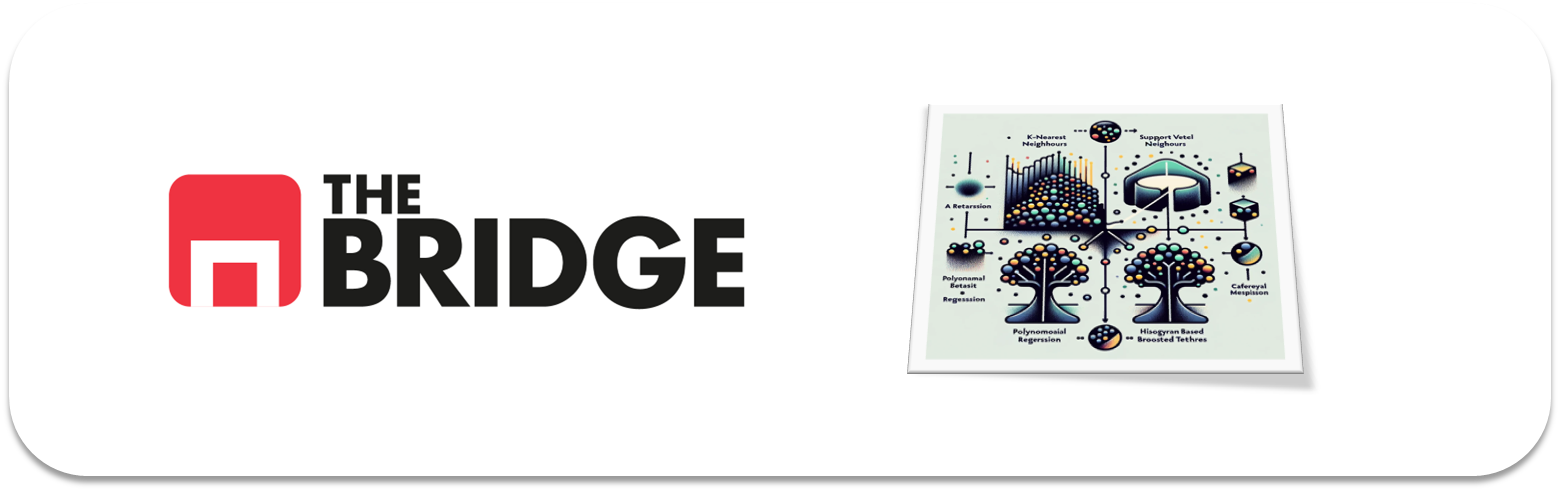

* La práctica consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [33]:
import numpy as np
import pandas as pd
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
#modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error # regresión
from sklearn.metrics import balanced_accuracy_score # clasificación

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad (quality para clasificación) del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico (alcohol para regresión) del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente usando mape sobre el grado alochólico real.

NOTA: El dataset está limpio y sin valores faltantes.

In [34]:
df = pd.read_csv('./datasets/wines_dataset.csv', sep='|')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


### Primer análisis

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [36]:
# sns.pairplot(df, hue='class')

In [37]:
# sns.pairplot(df, hue='alcohol')

In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### EDA

<Axes: >

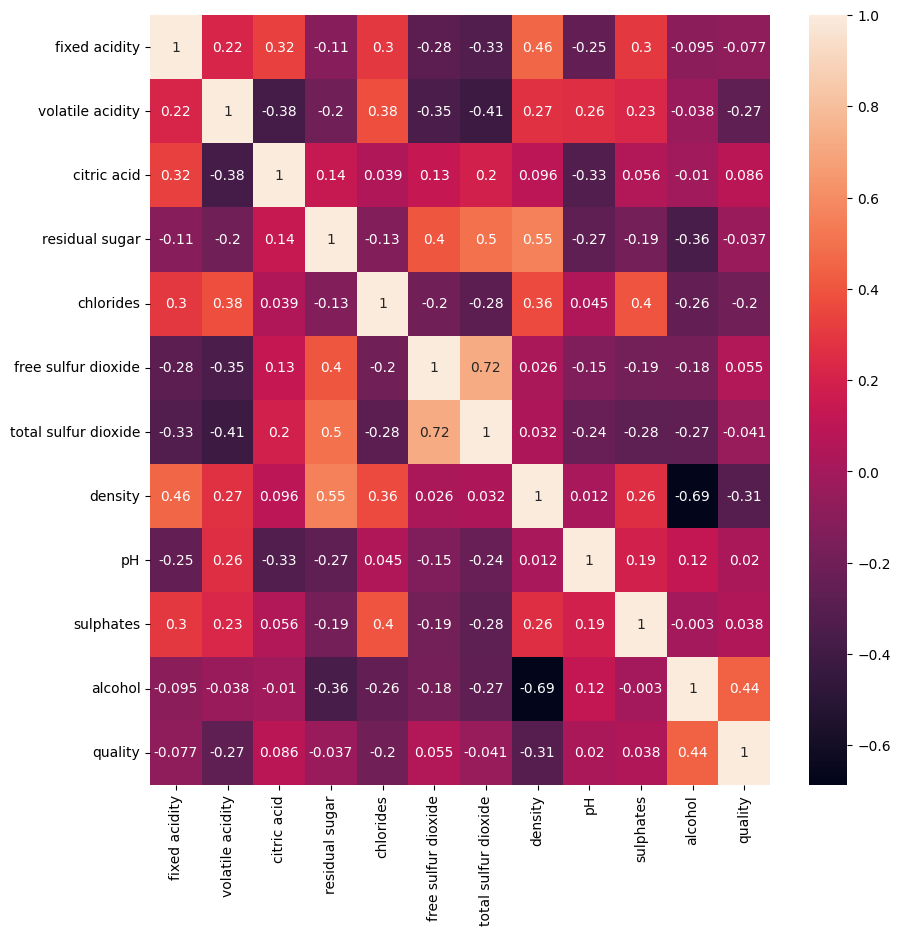

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.replace({'Red':0, 'White':1}).corr(numeric_only=True), annot=True)

<Axes: xlabel='class', ylabel='count'>

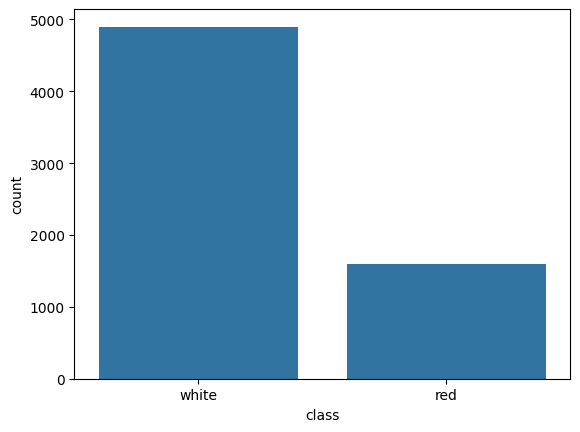

In [40]:
sns.countplot(x='class', data=df)

Parece que está un poco desbalanceado

<Axes: xlabel='alcohol', ylabel='count'>

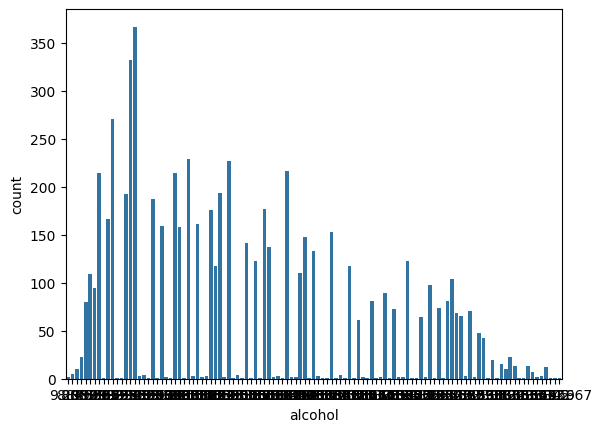

In [41]:
sns.countplot(x='alcohol', data=df)

<Axes: xlabel='class', ylabel='count'>

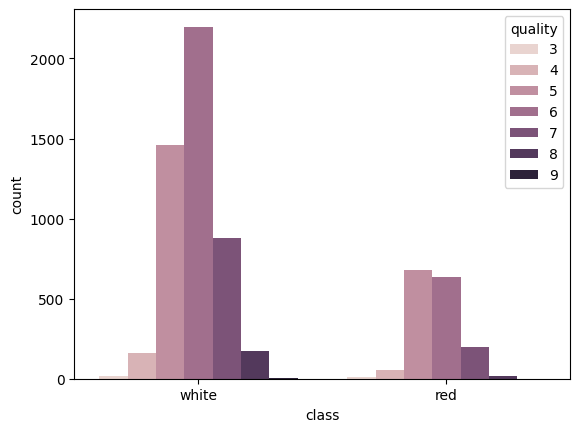

In [42]:
sns.countplot(x='class',hue='quality', data=df)

<Axes: xlabel='class', ylabel='count'>

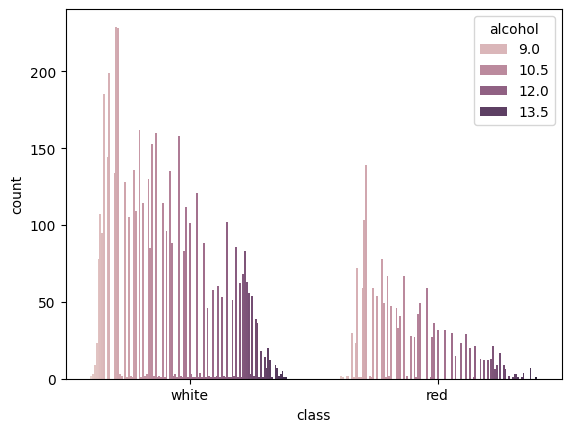

In [43]:
sns.countplot(x='class',hue='alcohol', data=df)

<Axes: xlabel='quality', ylabel='count'>

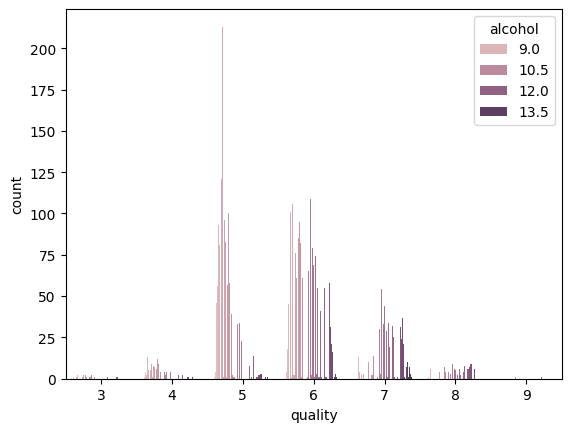

In [44]:
sns.countplot(x='quality',hue='alcohol', data=df)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

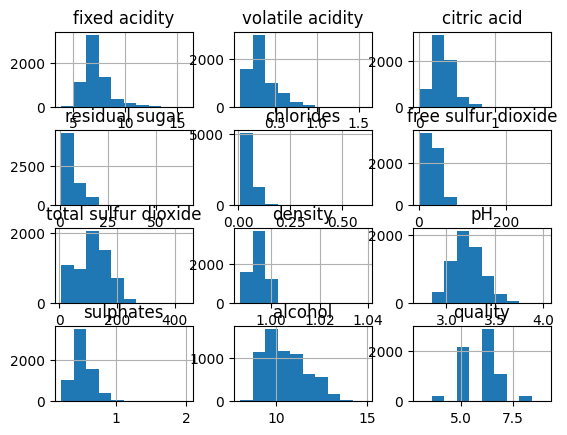

In [45]:
df.hist()

### Limpieza de datos

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

columnas_logaritmo = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

df_encoded_log = np.log(df[columnas_logaritmo]+1)


encoder = OneHotEncoder(sparse=False)

encoded_data = encoder.fit_transform(df[['class']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['class']))
df_encoded = pd.concat([df_encoded_log, df['quality'], encoded_df], axis=1)

c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
df_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class_red,class_white
0,2.251292,0.190620,0.231112,2.327278,0.033435,4.304065,4.962845,0.690393,1.398717,0.314811,2.517696,6,0.0,1.0
1,2.230014,0.148420,0.314811,2.186051,0.024693,3.663562,4.682131,0.689671,1.368639,0.314811,2.557227,6,0.0,1.0
2,2.054124,0.165514,0.322083,0.875469,0.037296,3.583519,4.718499,0.689039,1.463255,0.463734,2.501436,7,0.0,1.0
3,1.960095,0.231112,0.223144,1.360977,0.045929,5.669881,6.089045,0.689711,1.490654,0.494696,2.442347,3,0.0,1.0
4,2.140066,0.488580,0.239017,1.098612,0.079735,2.890372,4.521789,0.691225,1.449269,0.457425,2.379546,6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,2.163323,0.329304,0.292670,2.397895,0.054488,3.583519,5.187386,0.691846,1.449269,0.470004,2.415914,5,0.0,1.0
6493,2.219203,0.548121,0.190620,0.993252,0.071390,1.791759,2.639057,0.691546,1.435085,0.418710,2.351375,5,1.0,0.0
6494,2.128232,0.270027,0.392042,2.721295,0.041142,4.143135,5.323010,0.692297,1.401183,0.463734,2.341806,5,0.0,1.0
6495,2.230014,0.500775,0.095310,1.360977,0.085260,2.890372,3.713572,0.692162,1.456287,0.438255,2.351375,5,1.0,0.0


Normalizamos los valores con logaritmo

In [48]:
# Columnas a escalar
columnas_scaler = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos en las columnas seleccionadas
df_encoded_log[columnas_scaler] = scaler.fit_transform(df_encoded[columnas_scaler])
df_encoded_log

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.078000,-0.827205,-0.358913,1.035834,-0.668765,1.581893,0.550093,-0.064855,-1.056361,-1.167179,0.799276
1,0.931294,-1.194957,0.402485,0.828787,-0.952734,0.604676,0.148529,-0.545502,-1.849842,-1.167179,1.187901
2,-0.281461,-1.045989,0.468644,-1.092614,-0.543350,0.482554,0.200553,-0.966354,0.646246,0.458258,0.639420
3,-0.929784,-0.474346,-0.431399,-0.380828,-0.262922,3.665722,2.161136,-0.518790,1.369065,0.796198,0.058521
4,0.311107,1.769341,-0.287001,-0.765471,0.835188,-0.574982,-0.080843,0.488795,0.277272,0.389396,-0.558870
...,...,...,...,...,...,...,...,...,...,...,...
6492,0.471461,0.381340,0.201070,1.139364,0.015105,0.482554,0.871302,0.902064,0.277272,0.526688,-0.201342
6493,0.856753,2.288210,-0.727257,-0.919937,0.564121,-2.251138,-2.774114,0.702127,-0.096937,-0.033157,-0.835816
6494,0.229509,-0.135221,1.105048,1.613490,-0.418416,1.336362,1.065314,1.201857,-0.991302,0.458258,-0.929892
6495,0.931294,1.875616,-1.594281,-0.380828,1.014651,-0.574982,-1.237007,1.111933,0.462404,0.180164,-0.835816


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros. El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora.

In [49]:
train_set, test_set = train_test_split(df_encoded, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(train_set.drop(columns="quality"), train_set[["quality"]], test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)),
        ("XGBoost", XGBClassifier(n_jobs=-1, random_state=42)), 
        ("CatBoost", CatBoostClassifier(random_state=42, verbose=False))
    ]
)
voting_clf.fit(X_train, y_train)

for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


rf = 0.004807692307692308
XGBoost = 0.0009615384615384616
CatBoost = 0.0019230769230769232


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

modelos = {
    "Logistic Regression": LogisticRegression(n_jobs=-1, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoost": GradientBoostingRegressor(random_state=42),
    "Decision Tree Regresor": DecisionTreeRegressor(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=False)
    
}

# Define las métricas a usar
metricas = ["recall_macro"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train, y_train, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])

c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\cgdo2\Docume

In [52]:
resultados_df.T.sort_values(by=0, ascending=False)

,0
CatBoost_recall_macro,0.351981
Decision Tree_recall_macro,0.348826
RandomForestClassifier_recall_macro,0.347015
XGBoost_recall_macro,0.346512
Decision Tree Regresor_recall_macro,0.331017
KNN_recall_macro,0.270184
Logistic Regression_recall_macro,0.217580
AdaBoost_recall_macro,0.202937
SVC_recall_macro,0.181900
GradientBoost_recall_macro,NaN


In [53]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [3, 5],
#     'n_estimators': [50, 100],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bylevel': [0.6, 0.7],
#     'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS']
# }
# catb = CatBoostClassifier(verbose=False)

# grid_search = GridSearchCV(estimator=catb, param_grid=param_grid, cv=3, scoring='recall_macro')

# grid_search.fit(X_train, y_train)

# best_parameters = grid_search.best_params_
# best_model = grid_search.best_estimator_

In [54]:
# print(best_model)
# print('---'*200)
# print(classification_report(y_val, grid_search.predict(X_val)))

In [55]:
# voting_clf.voting = "soft"
# voting_clf.named_estimators["svc"].probability = True
# voting_clf.fit(X_train, y_train)
# voting_clf.score(X_val, y_val)

In [56]:
# train_acuracy = balanced_accuracy_score(y_train, voting_clf.predict(X_train))
# val_acuracy = balanced_accuracy_score(y_val, voting_clf.predict(X_val))

# print(train_acuracy)
# print(val_acuracy)

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara los modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros. Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns="alcohol"), df_encoded[["alcohol"]], test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [59]:
modelos = {
    "Logistic Regression": LogisticRegression(),
    "SVC_linear": SVC(kernel='linear'),
    "SVC_poly": SVC(kernel='poly',degree=4),
    "SVC_rbf": SVC(),
}

# Define las métricas a usar
metricas = ["accuracy", "recall_macro"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train, y_train, cv=5, scoring=metricas)
    
    # for metrica in metricas:
    #     clave = f"{nombre_modelo}_{metrica}"
    #     resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])

resultados_df.T

c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\utils\validation.py:118

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1216, in fit
    check_classification_targets(y)
  File "c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\utils\multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [ ]:
# El mape cuanto más cerca de 0 mejor